# PARCIAL 1
## Julian Sarmiento 20231678027 - Miller Barahona 20231678032
### Descripcion
Death by liver cirrhosis continues to increase, given the increase in alcohol consumption rates, chronic hepatitis infections, and obesity-related liver disease. Notwithstanding the high mortality of this disease, liver diseases do not affect all sub-populations equally. The early detection of pathology is a determinant of patient outcomes, yet female patients appear to be marginalized when it comes to early diagnosis of liver pathology. The dataset comprises 584 patient records collected from the NorthEast of Andhra Pradesh, India. The prediction task is to determine whether a patient suffers from liver disease based on the information about several biochemical markers, including albumin and other enzymes required for metabolism.


El dataset contiene las siguientes variables:

+ Age: Edad del paciente.
+ Gender: Género del paciente.
+ TB: Bilirrubina total.
+ DB: Bilirrubina directa.
+ Alkphos: Fosfatasa alcalina.
+ Sgpt: Alanina aminotransferasa.
+ Sgot: Aspartato aminotransferasa.
+ TP: Proteínas totales.
+ ALB: Albúmina.
+ A/G Ratio: Relación Albúmina/Globulina.
+ Selector: Variable objetivo que indica si el paciente tiene alguna afectación hepática (1) o no (2).

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
data = pd.read_csv('data.csv')
data

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio,Selector
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


# Check for missing values and data types


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        583 non-null    int64  
 1   Gender     583 non-null    object 
 2   TB         583 non-null    float64
 3   DB         583 non-null    float64
 4   Alkphos    583 non-null    int64  
 5   Sgpt       583 non-null    int64  
 6   Sgot       583 non-null    int64  
 7   TP         583 non-null    float64
 8   ALB        583 non-null    float64
 9   A/G Ratio  579 non-null    float64
 10  Selector   583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [9]:
data.head()

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio,Selector
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


# Check for unique values in 'Gender' and 'Selector'

In [10]:
data['Gender'].value_counts(), data['Selector'].value_counts()


(Gender
 Male      441
 Female    142
 Name: count, dtype: int64,
 Selector
 1    416
 2    167
 Name: count, dtype: int64)

# Impute missing values in 'A/G Ratio' using the median

In [11]:
data['A/G Ratio'].fillna(data['A/G Ratio'].median(), inplace=True)

C:\Users\Miller\AppData\Local\Temp\ipykernel_24468\553501330.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['A/G Ratio'].fillna(data['A/G Ratio'].median(), inplace=True)


# Convert 'Gender' to numerical values (Male: 1, Female: 0)

In [12]:
data['Gender'] = data['Gender'].map({'Male': 1, 'Female': 0})

In [13]:
data.info(), data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        583 non-null    int64  
 1   Gender     583 non-null    int64  
 2   TB         583 non-null    float64
 3   DB         583 non-null    float64
 4   Alkphos    583 non-null    int64  
 5   Sgpt       583 non-null    int64  
 6   Sgot       583 non-null    int64  
 7   TP         583 non-null    float64
 8   ALB        583 non-null    float64
 9   A/G Ratio  583 non-null    float64
 10  Selector   583 non-null    int64  
dtypes: float64(5), int64(6)
memory usage: 50.2 KB


(None,
    Age  Gender    TB   DB  Alkphos  Sgpt  Sgot   TP  ALB  A/G Ratio  Selector
 0   65       0   0.7  0.1      187    16    18  6.8  3.3       0.90         1
 1   62       1  10.9  5.5      699    64   100  7.5  3.2       0.74         1
 2   62       1   7.3  4.1      490    60    68  7.0  3.3       0.89         1
 3   58       1   1.0  0.4      182    14    20  6.8  3.4       1.00         1
 4   72       1   3.9  2.0      195    27    59  7.3  2.4       0.40         1)

# Correlation 

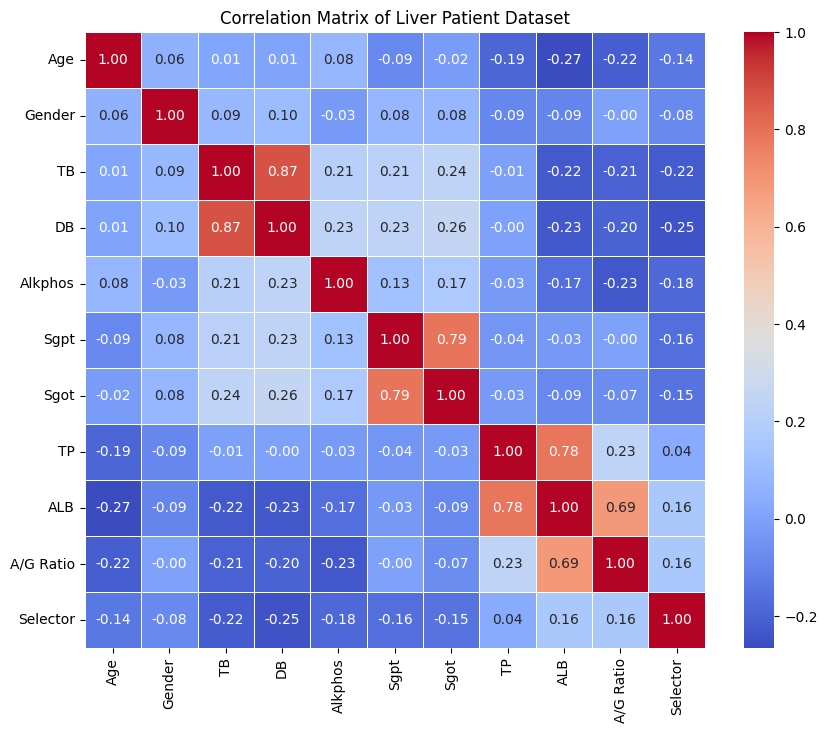

In [14]:
corr_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Liver Patient Dataset')
plt.show()


# Analyze Relationships

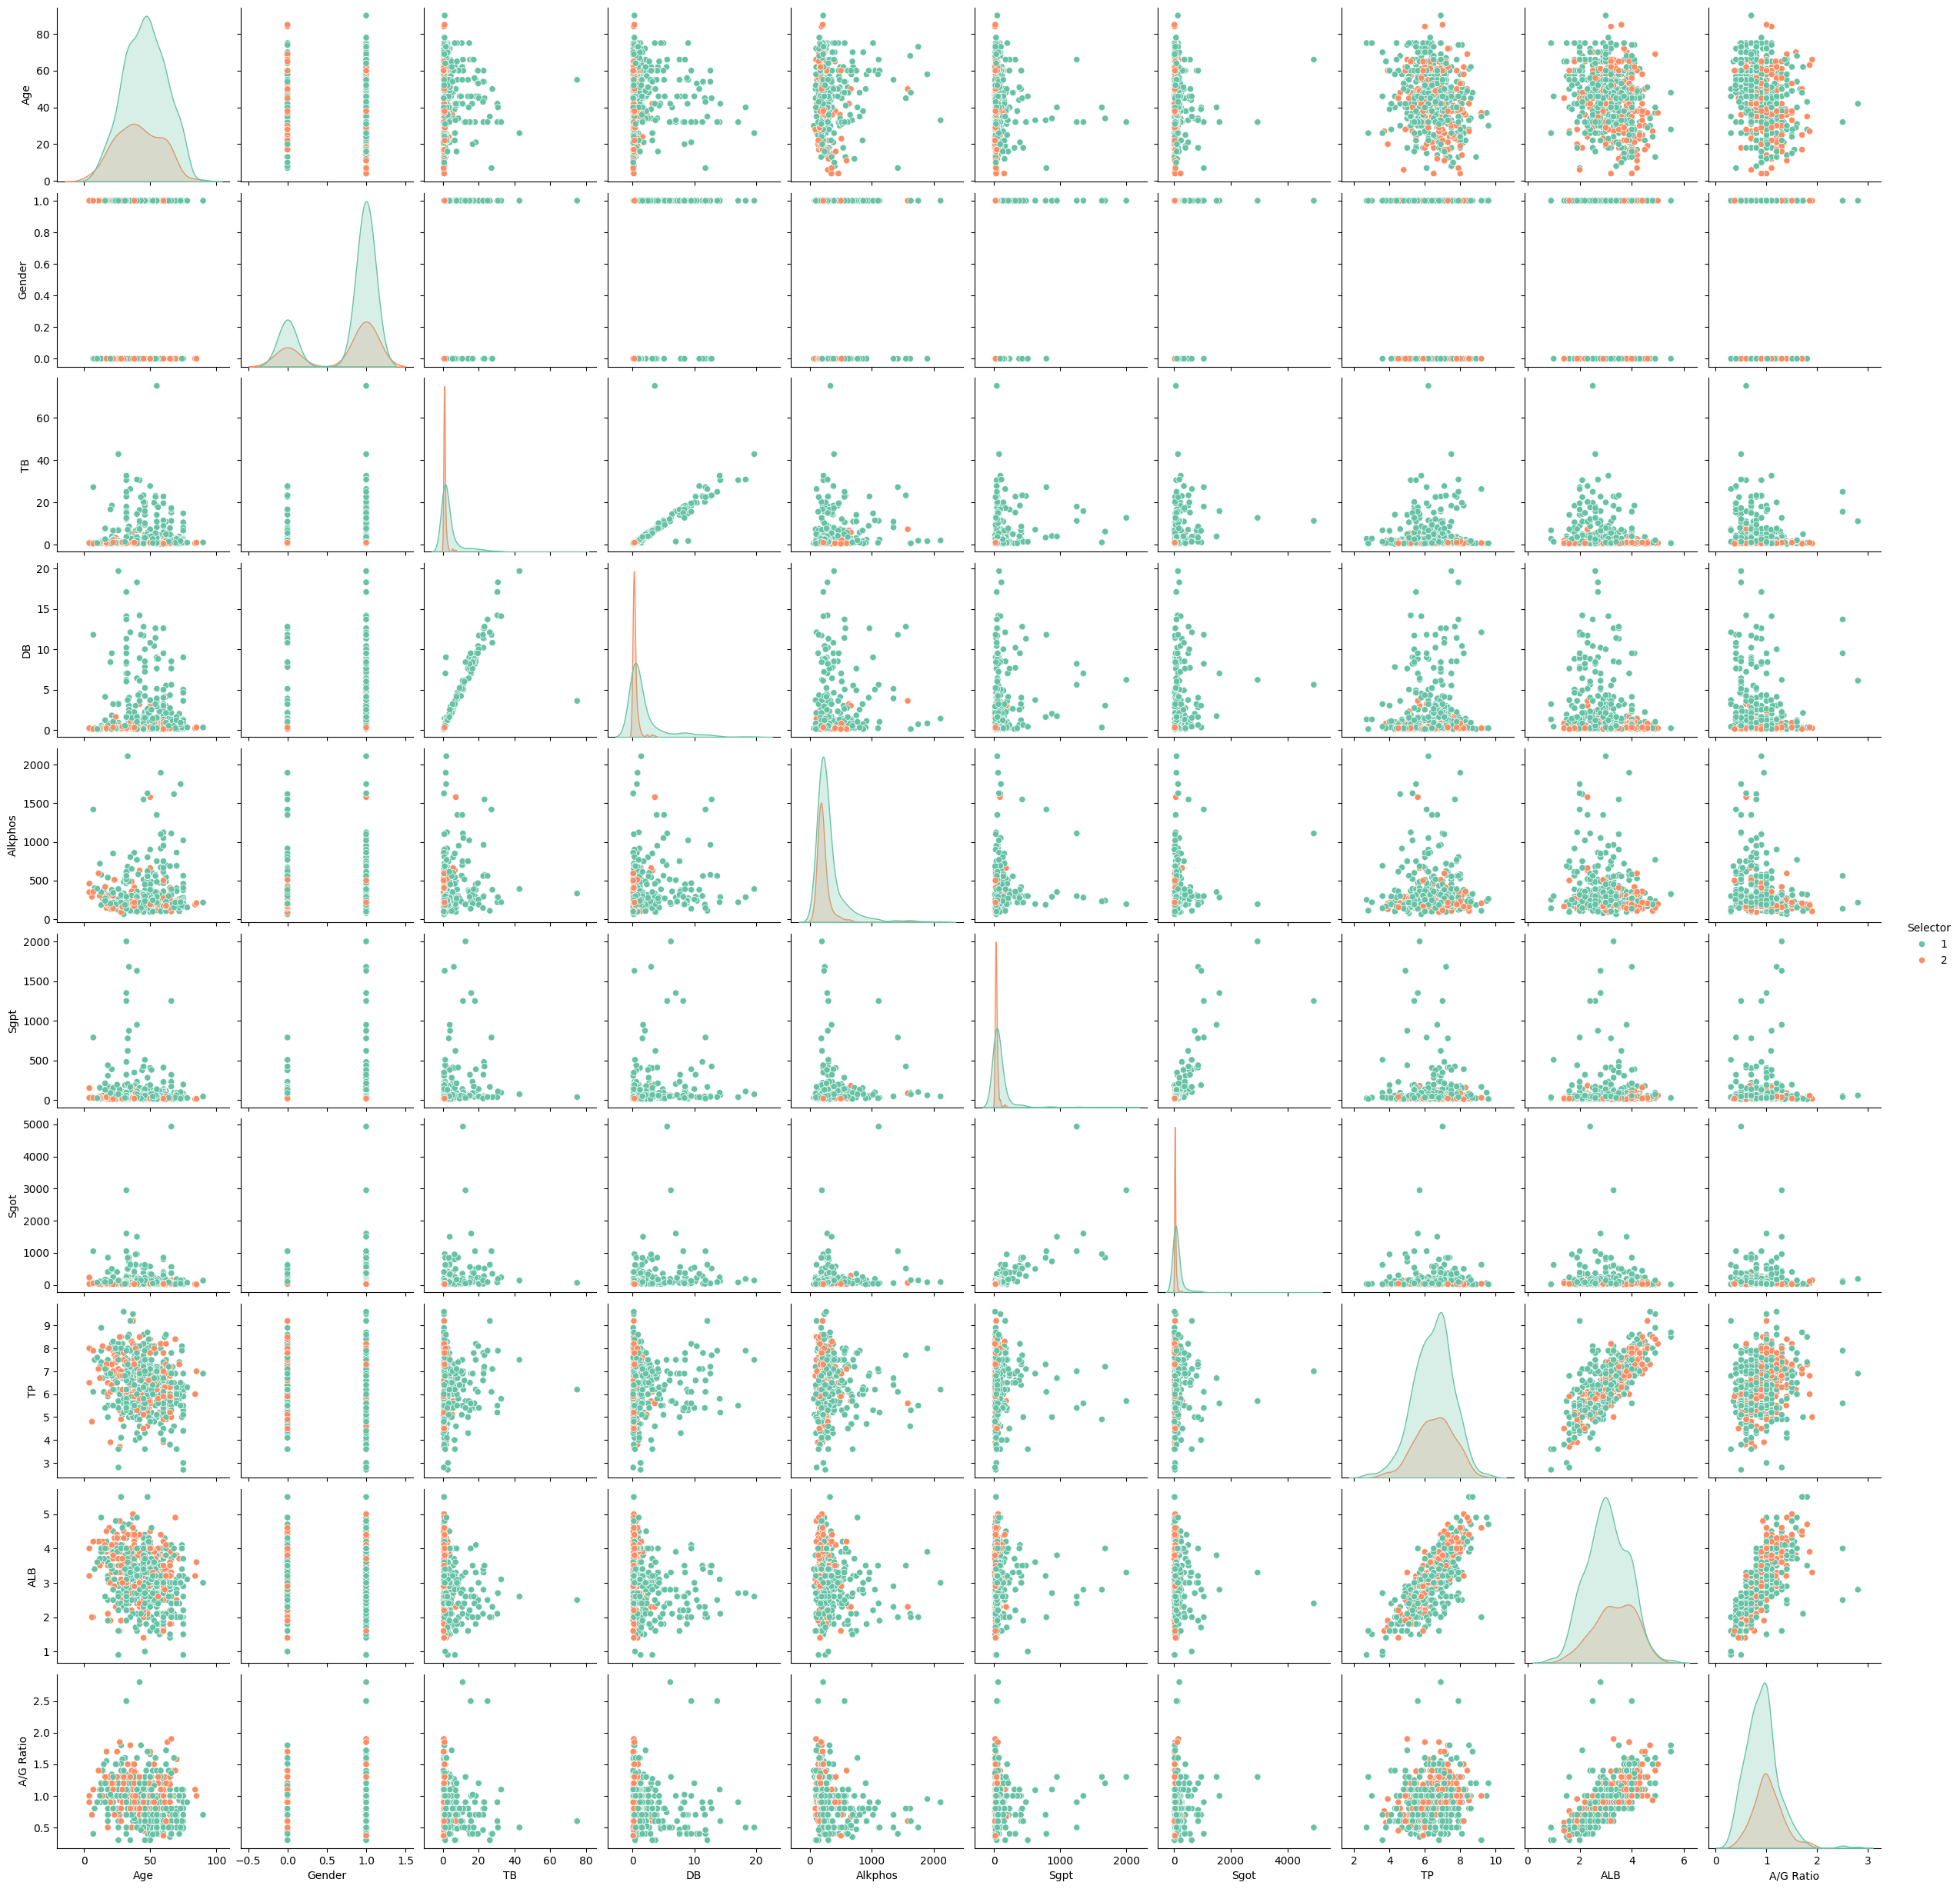

In [15]:
sns.pairplot(data, hue='Selector', diag_kind='kde', palette='Set2')
plt.show()


In [16]:
numeric_vars = [
    "TB",
    "DB"
]

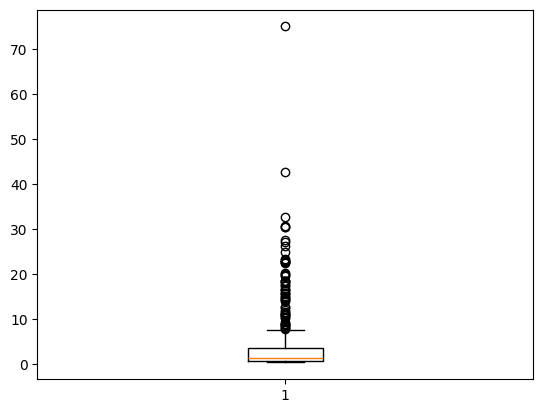

lim_sup: 11.309254128158305
lim_inf: -2.9804079743121505
outliers in inf
[]
outliers in sup
[14.2, 18.4, 12.7, 15.9, 18.0, 23.0, 22.7, 11.5, 75.0, 22.8, 14.1, 14.8, 27.2, 30.5, 16.4, 14.5, 18.5, 23.2, 22.6, 23.3, 19.8, 30.5, 32.6, 17.7, 18.4, 20.0, 26.3, 30.8, 19.6, 15.8, 20.2, 27.7, 42.8, 15.2, 16.6, 17.3, 22.5, 16.7, 15.6, 12.1, 25.0, 15.0, 12.7]


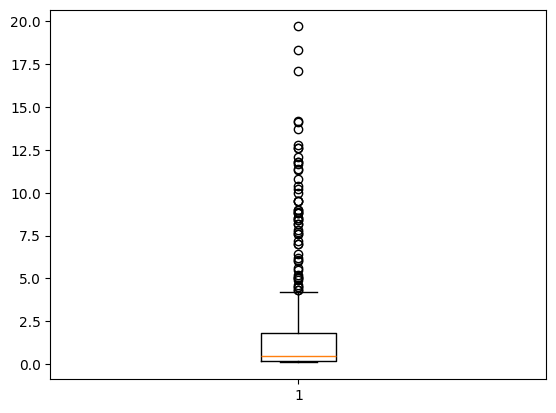

lim_sup: 5.130458810553428
lim_inf: -1.2833434259380427
outliers in inf
[]
outliers in sup
[5.5, 7.8, 8.8, 6.2, 7.0, 8.2, 11.3, 10.2, 5.6, 12.6, 7.6, 9.0, 11.8, 9.0, 14.2, 8.9, 7.0, 6.4, 9.5, 12.6, 11.4, 12.8, 10.4, 17.1, 14.1, 8.8, 8.5, 10.0, 12.1, 5.2, 18.3, 9.5, 7.2, 11.7, 10.8, 6.1, 19.7, 7.7, 7.6, 8.5, 11.8, 8.4, 9.5, 6.0, 13.7, 8.2, 8.4]


In [19]:
def calculate_numeric_outlier(col, const, selector):
    dataCol = data[data['Selector'] == selector][col]
    plt.boxplot(dataCol)
    plt.show()

    lim_sup = dataCol.mean() + (dataCol.std() * const)
    lim_inf = dataCol.mean() - (dataCol.std() * const)
    print(f"lim_sup: {lim_sup}")
    print(f"lim_inf: {lim_inf}")
    print(f'STD: {dataCol.std()}')
    print("outliers in inf")
    print(data[data[col] <= lim_inf][col].tolist())
    
    print("outliers in sup")
    print(data[data[col] >= lim_sup][col].tolist())

for col in numeric_vars:
    calculate_numeric_outlier(col, 1, 1)